## **Частина №1**

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

### Виконаємо завантаження та підготовку даних з набору fashion_mnist для навчання моделі.

In [ ]:
from tensorflow.keras.datasets import fashion_mnist
from sklearn.model_selection import train_test_split

In [ ]:
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
print("Розмір тренувального датасету:", len(train_data))
print("Мітки тренувального датасету:", train_labels)
print("Значення міток: від", min(train_labels), "до", max(train_labels))
print("Розмір тестового датасету:", len(test_data))

Розмір тренувального датасету: 60000
Мітки тренувального датасету: [9 0 0 ... 3 0 5]
Значення міток: від 0 до 9
Розмір тестового датасету: 10000


In [ ]:
print(train_data.shape)
print(train_labels.shape)
print(test_data.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


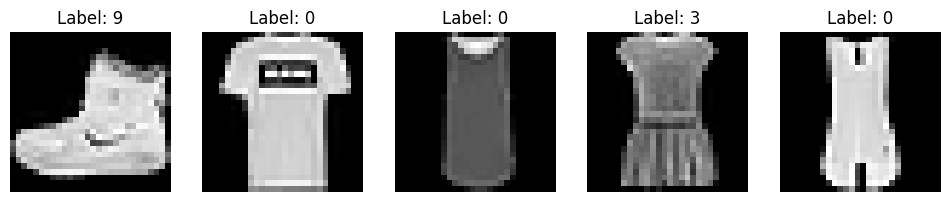

In [ ]:
num_samples = 5
plt.figure(figsize=(12, 4))

for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(train_data[i], cmap='gray')
    plt.title(f"Label: {train_labels[i]}")
    plt.axis('off')

plt.show()

### Створення моделі

In [ ]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), activation='relu'),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 13, 13, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 576)              

### Компіляція і тренування моделі

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_data, train_labels, epochs=12, batch_size=256,
                    validation_data=(test_data, test_labels))


Epoch 1/12
235/235 [==============================] - 47s 196ms/step - loss: 0.2483 - accuracy: 0.9079 - val_loss: 0.3571 - val_accuracy: 0.8732
Epoch 2/12
235/235 [==============================] - 46s 196ms/step - loss: 0.2265 - accuracy: 0.9164 - val_loss: 0.3164 - val_accuracy: 0.8917
Epoch 3/12
235/235 [==============================] - 44s 188ms/step - loss: 0.2104 - accuracy: 0.9217 - val_loss: 0.3120 - val_accuracy: 0.8903
Epoch 4/12
235/235 [==============================] - 45s 190ms/step - loss: 0.1947 - accuracy: 0.9272 - val_loss: 0.3335 - val_accuracy: 0.8896
Epoch 5/12
235/235 [==============================] - 45s 191ms/step - loss: 0.1894 - accuracy: 0.9301 - val_loss: 0.3209 - val_accuracy: 0.8946
Epoch 6/12
235/235 [==============================] - 52s 223ms/step - loss: 0.1783 - accuracy: 0.9331 - val_loss: 0.3240 - val_accuracy: 0.8934
Epoch 7/12
235/235 [==============================] - 52s 222ms/step - loss: 0.1677 - accuracy: 0.9364 - val_loss: 0.3434 - val_ac

Варто зазначити, що навчання моделі тривало майже 8 хвилини (порівняно з нейронною мережею у минулому завданні)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels)
print(f"Test Accuracy: {test_accuracy}")

313/313 [==============================] - 3s 11ms/step - loss: 0.3527 - accuracy: 0.8976
Test Accuracy: 0.897599995136261


In [ ]:
def history_visual(history):
    history_dict = history.history
    loss_values = history_dict['loss']
    val_loss_values = history_dict['val_loss']

    epochs = range(1, len(history_dict['accuracy']) + 1)

    plt.plot(epochs, loss_values, 'bo', label='Training loss')
    plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    plt.clf()
    val_acc_values = history_dict['val_accuracy']
    plt.plot(epochs, history_dict['accuracy'], 'bo', label='Training acc')
    plt.plot(epochs, history_dict['val_accuracy'], 'b', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

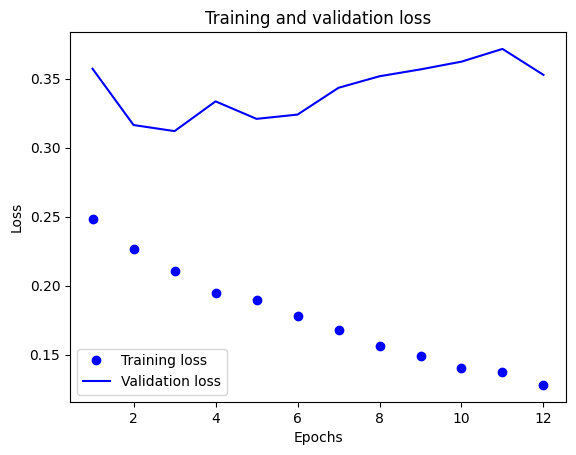

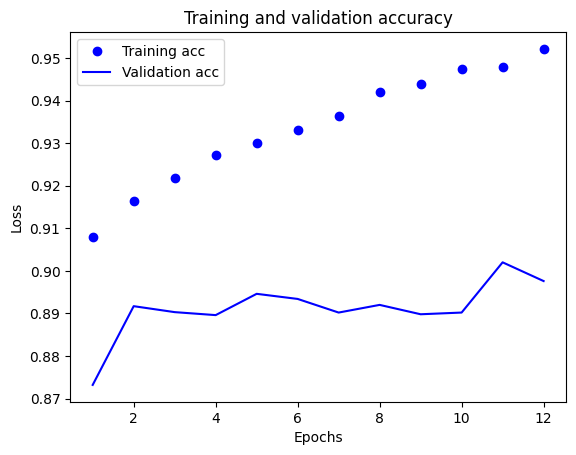

In [ ]:
history_visual(history)

### **Висновок №1**

Побудована модель показала гарні результати на навчальній вибірці: точність нейромережі становить приблизно 95%. На валідаційних даних результати дещо гірші: максимальна точність склала приблизно 90%. У порівнянні з найкращою моделлю, побудованою у домашньому завданні №9, згорткова нейромережа показала кращі результати.

# **Частина №2**

### Завантаження передвиборної моделі VGG16 без повністю з'єднаних шарів

In [ ]:
from tensorflow.keras.applications import VGG16

vgg16_base = VGG16(weights='imagenet', include_top=False,
                   input_shape=(64, 64, 3))
vgg16_base.trainable = False

vgg16_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

### Побудова моделі та її компіляція

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model1 = Sequential([
    vgg16_base,
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(10, activation='softmax')
])

model1.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

### Підготовка даних

In [ ]:
import numpy as np
from keras import layers
from keras import models
from keras.datasets import fashion_mnist
from keras.preprocessing.image import ImageDataGenerator
from PIL import Image

def resize_image(image, target_size=(64, 64)):
    image = Image.fromarray(image)
    image = image.resize(target_size)
    return np.array(image)

def preprocess_image(image):
    image = image / 255.0
    return image


(train_data1, train_labels1), (test_data1, test_labels1) = fashion_mnist.load_data()

train_data1, test_data1 = train_data1 / 255., test_data1 / 255.

resized_train_data = np.array([resize_image(img) for img in train_data1])
resized_test_data = np.array([resize_image(img) for img in test_data1])

# Перевірка розмірів після зміни
print(resized_train_data.shape)
print(resized_test_data.shape)

(60000, 64, 64)
(10000, 64, 64)


In [ ]:
resized_train_data = np.expand_dims(resized_train_data, axis=-1)
resized_train_data = np.repeat(resized_train_data, 3, axis=-1)
resized_test_data = np.expand_dims(resized_test_data, axis=-1)
resized_test_data = np.repeat(resized_test_data, 3, axis=-1)

print(resized_train_data.shape)
print(resized_test_data.shape)

(60000, 64, 64, 3)
(10000, 64, 64, 3)


### Тренування моделі

In [ ]:
history1 = model1.fit(
    resized_train_data,
    train_labels1,
    epochs=30,
    batch_size=256,
    validation_data=(resized_test_data, test_labels1)
)

Epoch 1/30
235/235 [==============================] - 35s 105ms/step - loss: 0.5957 - accuracy: 0.7898 - val_loss: 0.3685 - val_accuracy: 0.8664
Epoch 2/30
235/235 [==============================] - 23s 98ms/step - loss: 0.3916 - accuracy: 0.8600 - val_loss: 0.3510 - val_accuracy: 0.8705
Epoch 3/30
235/235 [==============================] - 23s 99ms/step - loss: 0.3565 - accuracy: 0.8728 - val_loss: 0.3157 - val_accuracy: 0.8876
Epoch 4/30
235/235 [==============================] - 23s 100ms/step - loss: 0.3332 - accuracy: 0.8798 - val_loss: 0.3018 - val_accuracy: 0.8903
Epoch 5/30
235/235 [==============================] - 21s 91ms/step - loss: 0.3176 - accuracy: 0.8849 - val_loss: 0.3020 - val_accuracy: 0.8923
Epoch 6/30
235/235 [==============================] - 24s 100ms/step - loss: 0.3093 - accuracy: 0.8875 - val_loss: 0.2996 - val_accuracy: 0.8917
Epoch 7/30
235/235 [==============================] - 24s 101ms/step - loss: 0.2950 - accuracy: 0.8921 - val_loss: 0.3028 - val_accur

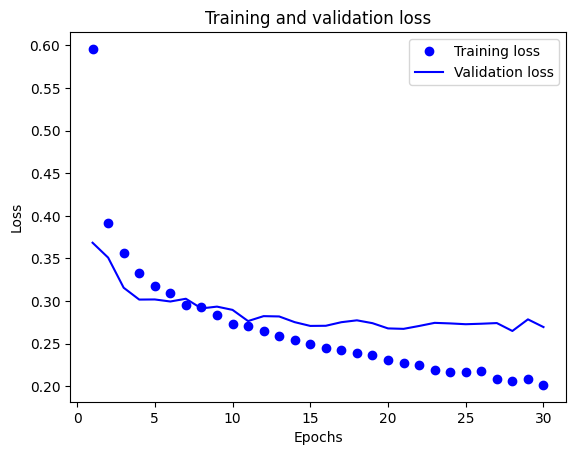

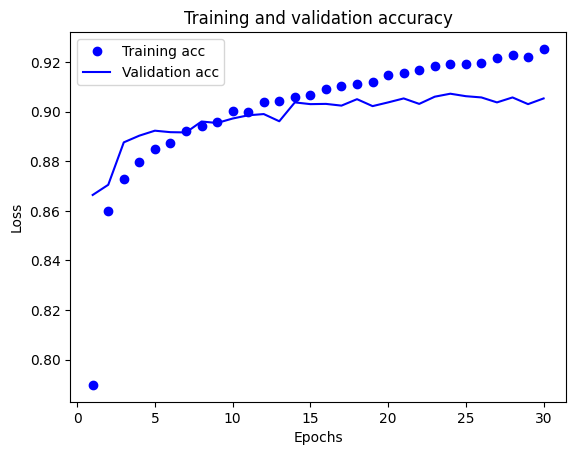

In [ ]:
import matplotlib.pyplot as plt

history_visual(history1)

### **Висновок №2**

Побудована модель з використанням VGG16 показала непогані результати на навчальній вибірці: точність нейромережі становить більше 92.5%. На валідаційних даних максимальна точність склала 90%. Ці результати схожі з тими, які було отримано у домашньому завданні №9, але гірші за отримані у першій частині завдання №10. Потрібно більше епох для якісного навчання моделі з використанням VGG16.